In [33]:
import os
import numpy as np
import pandas as pd
import glob
import shutil
import cv2
import sys

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read CSV File
hc_dir = os.path.join('..', 'Dataset', 'Histopathologic Cancer Detection')
csv_file_path = os.path.join(hc_dir, 'train_labels.csv')
df = pd.read_csv(csv_file_path)
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [11]:
df.shape

(220025, 2)

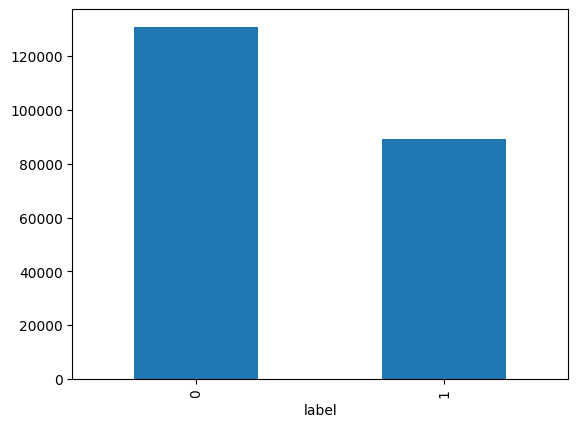

label
0    130908
1     89117
Name: count, dtype: int64

In [12]:
df['label'].value_counts().plot(kind='bar')
plt.show()
df['label'].value_counts()

In [14]:
ids_to_remove = ['00a6f3c301f5e6c1d205d1019e9d81ecb0a5fcb4', '00c084ee649e69c265a1fa8df4db3a0482d47f6c', 
 '00d0d08345178614ba03d28e0e4253458fb0e690', '00eaf7533c3de0aeeeb4a2e4b759f63cae0cbab8', 
 '0a3f067a2019ddcce944ffee336aeaa494ec2d7a', '0a6bebce3c7d416c0163fe042588dab3b5ec4672', 
 '0a866cd7b1bba5135144e57c0f6430b1120a7b52', '0adee14a2e961131ebb01468ac284d1be89585a8', 
 '0b2f343898d4024405b49ba444557805347c847a', '0b2e2a37723aeac9e826746c87f252dbf0c27d68', 
 '0b8d0b00761d809288fe4de1fcfd2c5cea2b52b9', '0b63e8dad1f3b19d32800c2ca0b2dad42c772a6e', 
 '0b899b3a24754b9edb228cad4cfda8cbc3ebe2b4', '0b5851c6efdac0e1d65287e1db8ec7201d38fac7', 
 '0ba4ade4c70d8f954653367466b719e864692244', '0bf8f877a663c60b918209b5e5e427a37b04ef76', 
 '0c9a27ba5f48da5c79d96f570ecce1617b72ba62', '0caf68fe013b33eba7d9912f2f6b2af5e458197f', 
 '0cb38667936ea807ea52a01174714a63be93c8af', '0cb694966c215e0ef2ef23ed18608d6f91c4b217', 
 '0d5c0cb3c049903b40454afe22effcfeb7e5e8f2', '0d015ee3e40aef06b8d34542f4d8d85f099c5aee', 
 '0d18bf71c37e017b8a40e4ad339bb44cb4e79058', '0dd2c3df71e8c6fcb55e4ced4190dfaba91b4faf', 
 '0e5dad902724226b3a83ee52ee35ad396e70af24', '0ec098ff7b836c3963bde5a3e56745a71e6967bd', 
 '0f2e57b32b7df53da712adbcdfdd841c0a901813', '0f4fddb9c3702a60259cd5435f2ae9a4a9f5d8cb', 
 '0f8b34b128c1edb788bcb573aa5c8e4c6b8908d5', '0f8f410f18454b5730bd1fb4cc71d61c653e1580', 
 '0f36ff31542eb6afd62aa25e2bd6a40a29338168', '0f264f02753c0bd929b9da7bccbec10ffea7796c', 
 '0f6293cf00c8532870071264e56f2b527627b82e', '0fafaba282d7f9aad6661e25e4ed45fcc66f5ebf', 
 '0fb5d95f6a671122ddc571b421f4da2b737bc386', '01b860f1d81a393b8777b9b807d96f74ad9e2820', 
 '1a0a38342e54207a7cc0ee5b56eb1795a9a6729d', '1a8399b630933a1973290416058a3fc382e41694', 
 '1a6494669b784500aec831408da51b53244ac664', '1b864fe0f0c2d1a801da3cf7b888618dfd98f06b', 
 '1be0022c832248989e4f804bd4807def41fedeb6', '1c0998a08643c80be4a49c3b26af6dc1a48c3be4', 
 '1d8bdf879da2bc356474f4b0493e03d0f05db778', '1de2c60ac7b58f6b76643b7efa1f8789b20de8e0', 
 '1f09840a8b95c14d6c4beb9008b1eb28458d3938', '02a4da6468773a754860d7a48f4849c3ce9b895a', 
 '02fe9b5631ca4535c2a7fd68dcca0d0235e19307', '2b615f883ad5a8530ff0ae18df0d58dfda3c4ab9', 
 '2ba88db8177758645796764af10fbcbe2ef03adc', '2bffa79fd60838c58e5cf8321c8fc98d1e08670d', 
 '9369c7278ec8bcc6c880d99194de09fc2bd4efbe', 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2', 
 '7bc3de585214a4ace7e311a99310aa5894f73f4d', '7ce935faf2d5c5ebf6d6ec81fff5a040af30f163',
 '7f98ff07383b8c5a1d2348930caf0d46ef640393', '16d32f03c77279d0f13526a0d8541b7064052809',
 '33a80667affb99e356f1c4e8262b87af68ab315a', '53c1f04277c9ce23bdbca4142cfd7378956433d7', 
                 '69e14e74a4bd3b141732e4ef7eab5c85fe6fcf80', '82ca753dbc584b2372b42079dbb24468970431eb',
                '93e78df3b132331ec63c241fbac23282faceb1eb', '283a4bfdf80759f5ed83edd181fbfe5297b5277b',
                '0312f2eefa9368ccb2a13ee22b6d8433fcffffe9', '821cc355adba224e44bb086a6d744af222627678', 
                 '876dfbe83e1a2d06b570051e2b8554596bc6da4e', '924e009f91bd5a9c92422a300c97bc8a5c9a95cd',
                '8246de06c2a738f8466eecbf471e40f7fda6893f', '87267c974a911474b0cb9ca3559fc2fc797319e8',
                '5737848e70454483694bcc7f72c76bf49bda8f41', 'a9cd935f4d7d0bd0f087c0929551d89158d8e4d9',
                'acd619575f2e0fda2f3e01970352d1e1a862c4bc', 'c66e92f58cd9aefd4d1a6c04f154291fa179f99f',
                'dfc49c8bba30fda27ddb2721a9117e156f414efc', 'e785275f995426d8308c877b32a1d78d1cdc5891', 
                'f76c339f595b0642ea5682a187916172693ce0b2']

# Remove rows where the 'id' is in the ids_to_remove list
df_filtered = df[~df['id'].isin(ids_to_remove)]

df_filtered.shape

(219973, 2)

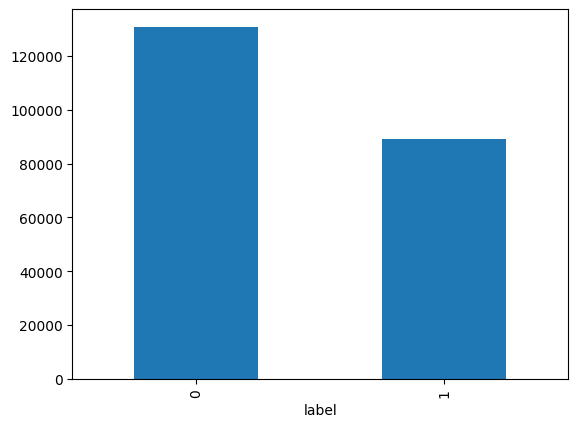

label
0    130857
1     89116
Name: count, dtype: int64

In [15]:
df_filtered['label'].value_counts().plot(kind='bar')
plt.show()
df_filtered['label'].value_counts()

In [36]:
SAMPLE_SIZE = 10000

# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df_filtered[df_filtered['label'] == 0].sample(SAMPLE_SIZE, random_state = 0)
# filter out class 1
df_1 = df_filtered[df_filtered['label'] == 1].sample(SAMPLE_SIZE, random_state = 0)

# concat the dataframes
df_data = pd.concat([df_0, df_1], axis = 0).reset_index(drop = True)

# shuffle
df_data = shuffle(df_data)

df_data['label'].value_counts()

label
0    10000
1    10000
Name: count, dtype: int64

In [37]:
# train_test_split
# stratify=y creates a balanced validation set.
y_label = df_data['label']
df_all, df_val = train_test_split(df_data, test_size = 0.1, random_state = 42, stratify = y_label)

y_label = df_all['label']
df_train, df_test = train_test_split(df_all, test_size = 0.4, random_state = 42, stratify = y_label)

In [38]:
df_train.shape, df_test.shape, df_val.shape
# df_all.shape, df_val.shape

((10800, 2), (7200, 2), (2000, 2))

In [39]:
# destination_dir = os.path.join('..', 'Dataset', 'Binary_class_dataset')

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# cnt = 1
# for row in df.itertuples():
# #     print(row[1], row[2])
#     image_name = f"{row[1]}.tif"
#     category = str(row[2])
    
#     image_path = os.path.join(hc_dir, 'train', image_name)
# #     image_path = os.path.join(hc_dir, 'test', image_name)
# #     print(image_path)
    
#     category_folder = os.path.join(destination_dir, category)
#     if not os.path.exists(category_folder):
#         os.makedirs(category_folder)
    
#     source_path = image_path
#     destination_path = os.path.join(category_folder, image_name)

#     # Move the image to the appropriate category folder
#     try:
#         shutil.move(source_path, destination_path)
#         print(f"Moved {image_name} to {category_folder}")
#     except Exception as e:
#         print(f"Error moving {image_name}: {e}")
    
# #     cnt += 1
# #     if cnt > 10:
# #         break

In [40]:
# destination_dir = os.path.join('..', 'Dataset', 'Binary_class_dataset')

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# cnt = 1
# for row in df_train.itertuples():
#     # print(row[1], row[2])
#     image_name = f"{row[1]}.tif"
#     category = str(row[2])
    
#     image_path = os.path.join(hc_dir, 'train', image_name)
#     # print(image_path)

#     # Read the image using OpenCV
#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Error loading image {image_name}")
#         continue

#     # Resize the image to 224x224
#     resized_image = cv2.resize(image, (224, 224))

#     category_folder = os.path.join(destination_dir, 'train', category)
#     if not os.path.exists(category_folder):
#         os.makedirs(category_folder)
    
#     # Save the resized image to the destination directory
#     # save_path = os.path.join(destination_dir, image_name)
#     destination_path = os.path.join(category_folder, image_name)
#     cv2.imwrite(destination_path, resized_image)
#     # print(f"Resized {image_name} to 224x224 and saved.")
    
#     # Print status message and clear the line
#     sys.stdout.write(f"\rResized {image_name} to 224x224 and saved.")
#     sys.stdout.flush()
    
# #     cnt += 1
# #     if cnt > 10:
# #         break

# print("\nAll training images processed.")

Resized f29a8d6ecfa87751f1dbe34c0e9e75590a18b639.tif to 224x224 and saved.
All training images processed.


In [41]:
# destination_dir = os.path.join('..', 'Dataset', 'Binary_class_dataset')

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# cnt = 1
# for row in df_test.itertuples():
#     # print(row[1], row[2])
#     image_name = f"{row[1]}.tif"
#     category = str(row[2])
    
#     image_path = os.path.join(hc_dir, 'train', image_name)
#     # print(image_path)

#     # Read the image using OpenCV
#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Error loading image {image_name}")
#         continue

#     # Resize the image to 224x224
#     resized_image = cv2.resize(image, (224, 224))

#     category_folder = os.path.join(destination_dir, 'test', category)
#     if not os.path.exists(category_folder):
#         os.makedirs(category_folder)
    
#     # Save the resized image to the destination directory
#     # save_path = os.path.join(destination_dir, image_name)
#     destination_path = os.path.join(category_folder, image_name)
#     cv2.imwrite(destination_path, resized_image)
#     # print(f"Resized {image_name} to 224x224 and saved.")
    
#     # Print status message and clear the line
#     sys.stdout.write(f"\rResized {image_name} to 224x224 and saved.")
#     sys.stdout.flush()
    
# #     cnt += 1
# #     if cnt > 10:
# #         break

# print("\nAll testing images processed.")

Resized 0af232baae8dfd204f2c42ea9bcc5a181ad64197.tif to 224x224 and saved.
All testing images processed.


In [42]:
# destination_dir = os.path.join('..', 'Dataset', 'Binary_class_dataset')

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# cnt = 1
# for row in df_val.itertuples():
#     # print(row[1], row[2])
#     image_name = f"{row[1]}.tif"
#     category = str(row[2])
    
#     image_path = os.path.join(hc_dir, 'train', image_name)
#     # print(image_path)

#     # Read the image using OpenCV
#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Error loading image {image_name}")
#         continue

#     # Resize the image to 224x224
#     resized_image = cv2.resize(image, (224, 224))

#     category_folder = os.path.join(destination_dir, 'val', category)
#     if not os.path.exists(category_folder):
#         os.makedirs(category_folder)
    
#     # Save the resized image to the destination directory
#     # save_path = os.path.join(destination_dir, image_name)
#     destination_path = os.path.join(category_folder, image_name)
#     cv2.imwrite(destination_path, resized_image)
#     # print(f"Resized {image_name} to 224x224 and saved.")
    
#     # Print status message and clear the line
#     sys.stdout.write(f"\rResized {image_name} to 224x224 and saved.")
#     sys.stdout.flush()
    
# #     cnt += 1
# #     if cnt > 10:
# #         break

# print("\nAll testing images processed.")

Resized 9920bf156c06df5e8d5f3d82ddc22e32610223ad.tif to 224x224 and saved.
All testing images processed.


In [43]:
df_dict = {
    'train' : df_train,
    'test' : df_test,
    'val' : df_val
}

def split_data(df_dict, image_size=(224,224)):
    destination_dir = os.path.join('..', 'Dataset', 'Binary_class_dataset')

    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    
    for key in df_dict.keys():
        folder_name = key
        df = df_dict[key]
        
        for row in df.itertuples():
            image_name = f"{row[1]}.tif"
            category = str(row[2])

            image_path = os.path.join(hc_dir, 'train', image_name)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            if image is None:
                print(f"Error loading image {image_name}")
                continue

            # Resize the image to 224x224
            resized_image = cv2.resize(image, image_size)

            category_folder = os.path.join(destination_dir, folder_name, category)
            if not os.path.exists(category_folder):
                os.makedirs(category_folder)

            # Save the resized image to the destination directory
            destination_path = os.path.join(category_folder, image_name)
            cv2.imwrite(destination_path, resized_image)

            # Print status message and clear the line
            sys.stdout.write(f"\rResized {image_name} to 224x224 and saved.")
            sys.stdout.flush()

        print(f"\nAll {folder_name} images processed.")

split_data(df_dict)

train                                              id  label
14889  1e130e0c0958e93e276945531e77f9d62669133e      1
14824  29d953f45a35c2678e7039336eda04e5ab0bd393      1
4353   a3296bf6887af6880d29281f6b08aeb131f9b457      0
820    32d70942767a411140cdab49e6e062352488b2a2      0
1237   fd7b792e3ffd250cb9099f98a3d145aa3afd3b4f      0
...                                         ...    ...
10020  b1ea8b8fb3b2dbfacd867348bd28a0681736601d      1
7570   a681a0725baa9a2d31fc2657a49409245b53d12c      0
14405  70d4e9894d86853b0453eacebafa3abc1fc8bbe6      1
13144  3886fe864ee63a91ac7c2a44dff753c084b3ce86      1
9773   f29a8d6ecfa87751f1dbe34c0e9e75590a18b639      0

[10800 rows x 2 columns]
test                                              id  label
14891  2c9c09ebf2c53e560e100864775e6bf6c3b7c013      1
9854   ecfb0f95a51c7d391d9effff8ea72841f2ecf4c6      0
891    5c70927ef6cd8ae9f81da0e730ab5c4ecf3b5d3c      0
9569   9c206aae322f515081b312139de402430f1de755      0
16182  69972426050dea2afe9b4